>     ĐÔI NÉT VỀ LENDINGCLUB

- Đây là một tổ chức cho vay ngang hàng (Peer - to - Peer) đầu tiên tại Mỹ, cho phép các nhà đầu tư cá nhân và tổ chức đầu tư vào các khoản vay cá nhân. 
- Các khoản vay được cấp cho các vay tiêu dùng như: vay mua ô tô, thanh toán thẻ tín dụng hoặc tín dụng cá nhân và được đánh giá dựa trên nhiều yếu tố, bao gồm: điểm tín dụng của vay, lịch sử tín dụng và thu nhập,… 
- So với vay tiền truyền thống, LendingClub hoạt động thông qua mô hình kết nối vay và cho vay trực tiếp, giúp giảm thiểu chi phí và thủ tục.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder 
import urllib.parse #pip install urllib
from sqlalchemy import create_engine, text # pip install sqlalchemy
import pyodbc as odbc #pip install pyodbc
# import statsmodels.api as sm 

In [6]:
for driver in odbc.drivers():
    print(driver)

SQL Server
SQL Server Native Client 11.0
SQL Server Native Client RDA 11.0
ODBC Driver 17 for SQL Server


In [7]:
connectString = 'Driver={ODBC Driver 17 for SQL Server}; Server=LAPTOP-4DVDSVMD\\SQLEXPRESS; Database=KHTN; Trusted_Connection=yes'
url = urllib.parse.quote(connectString)
engine = create_engine(f"mssql+pyodbc:///?odbc_connect={url}")
connection = engine.connect()
query = text("SELECT * FROM loans_full_schema")
dataset = pd.read_sql(query, connection)
df= dataset .copy()
connection.close()

In [8]:
df

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.010000,NA,None,NA,...,C3,Mar-18,Current,whole,Cash,27015.859375,1999.329956,984.140015,1015.190002,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.040000,NA,None,NA,...,C1,Feb-18,Current,whole,Cash,4651.370117,499.119995,348.630005,150.490005,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.150000,NA,None,NA,...,D1,Feb-18,Current,fractional,Cash,1824.630005,281.799988,175.369995,106.430000,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.160000,NA,None,NA,...,A3,Jan-18,Current,whole,Cash,18853.259766,3312.889893,2746.739990,566.150024,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.959999,57000,Verified,37.66,...,C3,Mar-18,Current,whole,Cash,21430.150391,2324.649902,1569.849976,754.799988,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,owner,10.0,TX,RENT,108000.0,Source Verified,22.280001,NA,None,NA,...,A4,Jan-18,Current,whole,Cash,21586.339844,2969.800049,2413.659912,556.140015,0.0
9996,director,8.0,PA,MORTGAGE,121000.0,Verified,32.380001,NA,None,NA,...,D3,Feb-18,Current,whole,Cash,9147.440430,1456.310059,852.559998,603.750000,0.0
9997,toolmaker,10.0,CT,MORTGAGE,67000.0,Verified,45.259998,107000,Source Verified,29.57,...,E2,Feb-18,Current,fractional,Cash,27617.650391,4620.799805,2382.350098,2238.449951,0.0
9998,manager,1.0,WI,MORTGAGE,80000.0,Source Verified,11.990000,NA,None,NA,...,A1,Feb-18,Current,whole,Cash,21518.119141,2873.310059,2481.879883,391.429993,0.0


In [9]:
df = pd.DataFrame(dataset)
df.dtypes

emp_title                            object
emp_length                          float64
state                                object
homeownership                        object
annual_income                       float64
verified_income                      object
debt_to_income                      float64
annual_income_joint                  object
verification_income_joint            object
debt_to_income_joint                 object
delinq_2y                             int64
months_since_last_delinq             object
earliest_credit_line                  int64
inquiries_last_12m                    int64
total_credit_lines                    int64
open_credit_lines                     int64
total_credit_limit                    int64
total_credit_utilized                 int64
num_collections_last_12m              int64
num_historical_failed_to_pay          int64
months_since_90d_late                object
current_accounts_delinq               int64
total_collection_amount_ever    

In [10]:
df.shape

(10000, 55)

In [11]:
df.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.010000,NA,None,NA,...,C3,Mar-18,Current,whole,Cash,27015.859375,1999.329956,984.140015,1015.190002,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.040000,NA,None,NA,...,C1,Feb-18,Current,whole,Cash,4651.370117,499.119995,348.630005,150.490005,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.150000,NA,None,NA,...,D1,Feb-18,Current,fractional,Cash,1824.630005,281.799988,175.369995,106.430000,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.160000,NA,None,NA,...,A3,Jan-18,Current,whole,Cash,18853.259766,3312.889893,2746.739990,566.150024,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.959999,57000,Verified,37.66,...,C3,Mar-18,Current,whole,Cash,21430.150391,2324.649902,1569.849976,754.799988,0.0


In [12]:
df.describe()

,emp_length,annual_income,debt_to_income,delinq_2y,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,...,tax_liens,loan_amount,term,interest_rate,installment,balance,paid_total,paid_principal,paid_interest,paid_late_fees
count,9183.000000,1.000000e+04,9976.000000,10000.00000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,9928.000000,10000.000000,10000.000000,10000.000000,9900.000000,10000.000000
mean,5.930306,7.922215e+04,19.308192,0.21600,2001.29000,1.95820,22.679600,11.40440,1.836062e+05,51049.063100,...,0.043300,16361.922500,43.272000,12.427524,477.285176,14458.916605,2494.234773,1894.448467,601.226142,0.119516
std,3.703734,6.473429e+04,15.004851,0.68366,7.79551,2.38013,11.885439,5.86828,1.876327e+05,53636.731172,...,0.593852,10301.956759,11.029877,5.001105,295.285053,9964.561864,3958.230369,3884.407177,517.838421,1.813468
min,0.000000,0.000000e+00,0.000000,0.00000,1963.00000,0.00000,2.000000,0.00000,0.000000e+00,0.000000,...,0.000000,1000.000000,36.000000,5.310000,30.750000,0.000000,0.000000,0.000000,0.410000,0.000000
25%,2.000000,4.500000e+04,11.057500,0.00000,1997.00000,0.00000,14.000000,7.00000,5.159375e+04,19185.500000,...,0.000000,8000.000000,36.000000,9.430000,256.390015,6679.064941,928.700012,587.099976,222.645004,0.000000
50%,6.000000,6.500000e+04,17.570000,0.00000,2003.00000,1.00000,21.000000,10.00000,1.146670e+05,36927.000000,...,0.000000,14500.000000,36.000000,11.980000,398.519989,12379.495117,1563.300049,984.989990,446.804993,0.000000
75%,10.000000,9.500000e+04,25.002500,0.00000,2006.00000,3.00000,29.000000,14.00000,2.675500e+05,65421.000000,...,0.000000,24000.000000,60.000000,15.050000,645.457504,20690.182617,2616.004944,1694.555023,826.372513,0.000000
max,10.000000,2.300000e+06,469.089996,13.00000,2015.00000,29.00000,87.000000,51.00000,3.386034e+06,942456.000000,...,52.000000,40000.000000,60.000000,30.940001,1566.589966,40000.000000,41630.445312,40000.000000,4216.439941,52.980000


In [209]:
df = df.astype({ 'delinq_2y':'float',
                 'earliest_credit_line':'float',
                 'inquiries_last_12m':'float',
                 'total_credit_lines':'float',
                 'open_credit_lines':'float',
                 'total_credit_limit':'float',
                 'total_credit_utilized':'float',
                 'num_collections_last_12m':'float',
                 'num_historical_failed_to_pay':'float',
                 'current_accounts_delinq':'float',
                 'total_collection_amount_ever':'float',
                 'current_installment_accounts':'float',
                 'accounts_opened_24m':'float',
                 'num_satisfactory_accounts':'float',
                 'num_accounts_30d_past_due':'float',
                  'num_active_debit_accounts':'float',
                  'total_debit_limit':'float',
                  'num_total_cc_accounts':'float',
                  'num_open_cc_accounts':'float',
                  'num_cc_carrying_balance':'float',
                  'num_mort_accounts':'float',
                  'tax_liens':'float',
                  'public_record_bankrupt':'float',
                  'loan_amount':'float',
                  'term':'float'
              } )
   

In [210]:
df['emp_length']= df['emp_length'].fillna(0).astype(float)  
df['debt_to_income'] = df['debt_to_income'].fillna(0).astype(float) 
df['annual_income_joint'] = df['annual_income_joint'].fillna(0).astype(float)
df['verification_income_joint'] = df['verification_income_joint'].fillna('Not Verified')
df['debt_to_income_joint'] = df['debt_to_income_joint'].fillna(0).astype(float)
df['months_since_last_delinq'] = df['months_since_last_delinq'].fillna(0).astype(float) 
df['months_since_90d_late'] = df['months_since_90d_late'].fillna(0).astype(float) 
df['months_since_last_credit_inquiry'] = df['months_since_last_credit_inquiry'].fillna(0).astype(float)
df['num_accounts_120d_past_due'] = df['num_accounts_120d_past_due'].fillna(0).astype(float)

<AxesSubplot: xlabel='interest_rate', ylabel='Count'>

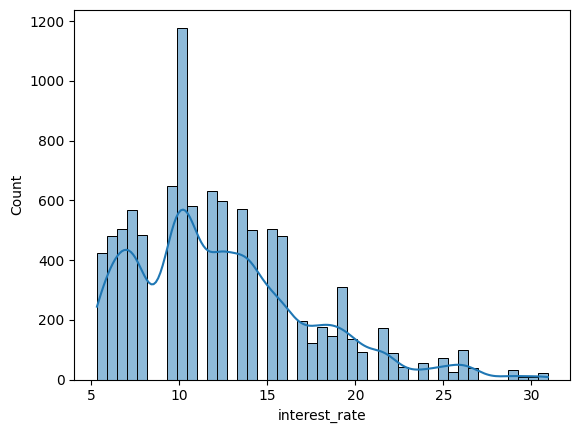

In [32]:
sns.histplot(data=df, x='interest_rate', bins=45, kde=True)

Lãi suất được phân bổ chủ yếu trong khoảng 12-16%, với một số ngoại lệ trên 25%.

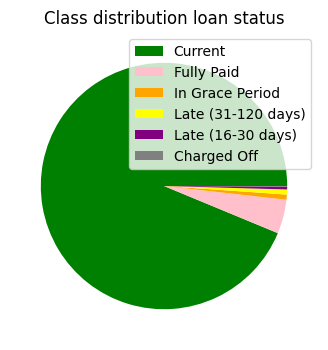

In [154]:
labels=['Current','Fully Paid','In Grace Period','Late (31-120 days)','Late (16-30 days)','Charged Off']
colors=['green','pink','orange','yellow','purple','gray']                                      
class_counts = df['loan_status'].value_counts()
plt.figure(figsize=(6, 4))
plt.pie(class_counts, colors=colors)
plt.legend(labels, loc='best')
# plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.title('Class distribution loan status')
plt.show()

Hơn 70% là trạng thái của các khoản vay thuộc Current (các khoản vay còn dư nợ nhưng thanh toán đầy đủ các khoản nợ hàng tháng).Tỷ lệ trạng thái Current cao cho thấy đa số các khoản vay đang được quản lý tốt, được thanh toán đầy đủ các khoản nợ hàng tháng. Điều này cho thấy khách hàng đang có năng lực thanh toán tốt hoặc đang được hỗ trợ để đưa khoản vay về trạng thái hiệu quả. Bên cạnh đó, việc tỷ lệ trạng thái Current cao còn giúp cho công ty cho vay giảm thiểu rủi ro và có thể thu được lợi nhuận từ việc cho vay.

Tỷ lệ charged off rất thấp cũng cho thấy rủi ro của các khoản vay là thấp và công ty cho vay đang có chính sách quản trị nợ khá hiệu quả


In [13]:
cross_tab = pd.crosstab(df['loan_status'], df['grade'])
cross_tab

grade,A,B,C,D,E,F,G
loan_status,,,,,,,
Charged Off,2,2,1,2,0,0,0
Current,2341,2896,2467,1323,291,47,10
Fully Paid,99,108,134,74,27,4,1
In Grace Period,10,11,19,18,8,1,0
Late (16-30 days),3,7,12,10,3,2,1
Late (31-120 days),4,13,20,19,6,4,0


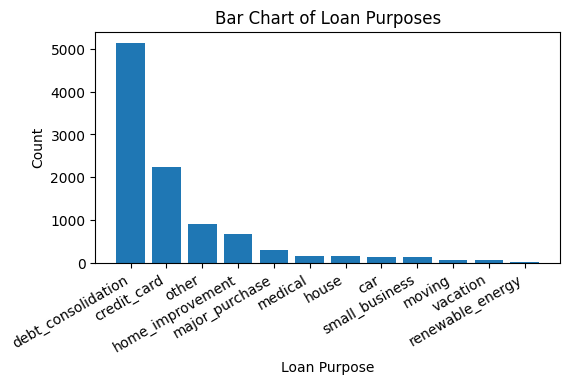

In [30]:
plt.figure(figsize=(6,3))
purpose_counts = df['loan_purpose'].value_counts()
plt.bar(purpose_counts.index, purpose_counts.values)
plt.title('Bar Chart of Loan Purposes')
plt.xlabel('Loan Purpose')
plt.ylabel('Count')
plt.xticks(rotation=30,ha='right')
plt.show()

Mục đích vay chủ yếu và chiếm đa số trong tập dữ liệu này là hợp nhất nợ, hay còn gọi là vay đảo nợ (debt_consolidation)

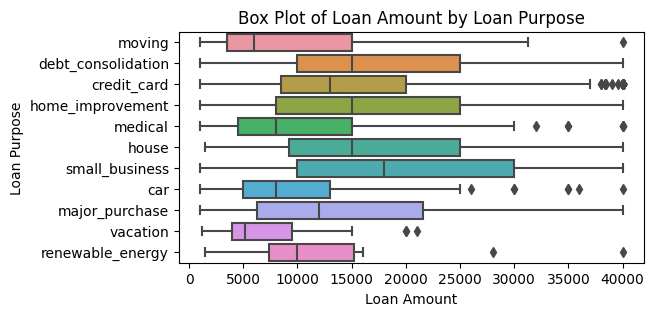

In [15]:
plt.figure(figsize=(6,3))
sns.boxplot(x='loan_amount', y='loan_purpose', data=df[df['loan_purpose'].isin(['debt_consolidation','moving', 'credit_card', 'home_improvement', 'medical', 'house', 'car', 'major_purchase', 'vacation', 'small_business','renewable_energy'])])
plt.title('Box Plot of Loan Amount by Loan Purpose')
plt.xlabel('Loan Amount')
plt.ylabel('Loan Purpose')
plt.show()

Khối lượng tiền cho vay với mục đích thẻ tín dụng có khá nhiều ngoại lai

C:\Users\Admins\AppData\Local\Temp\ipykernel_14132\52978474.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['interest_rate'], shade=True)


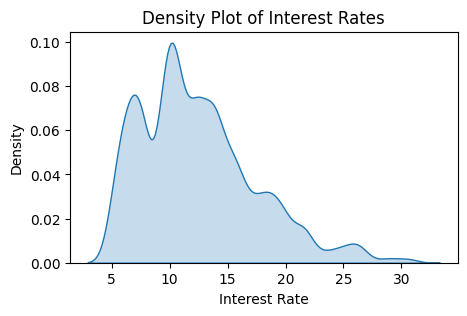

In [171]:
plt.figure(figsize=(5,3))
sns.kdeplot(df['interest_rate'], shade=True)
plt.title('Density Plot of Interest Rates')
plt.xlabel('Interest Rate')
plt.ylabel('Density')
plt.show()

Biểu đồ mật độ cho thấy lãi suất bị lệch phải, với mức cao nhất khoảng 12%. Phân phối cũng có một đuôi dài về bên phải, cho thấy có một số khoản vay với lãi suất rất cao trên 25%.

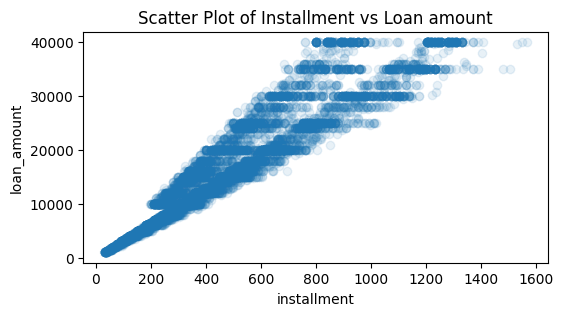

In [29]:
plt.figure(figsize=(6,3))
plt.scatter(df['installment'], df['loan_amount'], alpha=0.1)
plt.title('Scatter Plot of Installment vs Loan amount')
plt.xlabel('installment')
plt.ylabel('loan_amount')
plt.show()

Khoản trả góp (Installment) và lượng tiền vay (Loan amount) có mối tương quan dương, khoản trả góp hàng tháng càng cao thì số tiền khách muốn vay càng lớn.

In [85]:
def loan_classification(i):
    if i in ['moving', 'credit_card', 'home_improvement', 'medical', 'house', 'car', 'major_purchase', 'vacation']:
        return 1
    elif i in ['small_business', 'renewable_energy']:
        return 2
    else:
        return 3
df['loan_purpose'] = df['loan_purpose'].apply(loan_classification).astype(float)

In [84]:
df['verified_income'] = df['verified_income'].replace('Source Verified','Verified')
df['verification_income_joint'] = df['verification_income_joint'].replace('Source Verified','Verified')
df['verified_income'] = df['verified_income'].map({'Not Verified':0,'Verified':1}).astype(float)
df['verification_income_joint'] = df['verification_income_joint'].map({'Not Verified':0,'Verified':1}).astype(float)
df['application_type'] =  df['application_type'].map({'individual':0,'joint':1}).astype(float)
df['initial_listing_status']= df['initial_listing_status'].map({'fractional':0,'whole':1}).astype(float)
df['disbursement_method']= df['disbursement_method'].map({'DirectPay':0,'Cash':1}).astype(float)  
df['homeownership']= df['homeownership'].map({'MORTGAGE':0,'RENT':1,'OWN':2}).astype(float)
df['loan_status'] = df['loan_status'].map({'Current':1,'Fully Paid':2,'In Grace Period':3,'Late (31-120 days)':4,
                                           'Late (16-30 days)':5,'Charged Off':6}).astype(float)

In [87]:
Y = df['interest_rate']
X = df.drop(['interest_rate','emp_title','state','issue_month'],axis=1)

In [95]:
grade1=['A','B','C','D','E','F','G']
ordi01 = OrdinalEncoder(categories=[grade1]) 
ordi01.fit_transform(X[['grade']])
X['grade']=pd.DataFrame(ordi01.transform(X[['grade']]))

In [94]:
#subgrade1= sorted(df['sub_grade'].unique())
subgrade1=['A1','A2','A3','A4','A5','B1','B2','B3','B4','B5','C1','C2','C3','C4','C5','D1','D2','D3','D4','D5','E1','E2','E3','E4','E5','F1','F2','F3','F4','F5','G1','G2','G3','G4','G5'] 
ordi02 = OrdinalEncoder(categories=[subgrade1])
X['sub_grade']=ordi02.fit_transform(X[['sub_grade']])

In [90]:
X = sm.add_constant(X)
Model_OLS = sm.OLS(Y, X).fit()
d = {}
for i in X.columns.tolist():
    d[f'{i}'] = Model_OLS.pvalues[i]
df_pvalue= pd.DataFrame(d.items(), columns=['var_name', 'p-value']).sort_values(by = 'p-value').reset_index(drop=True)

In [91]:
list=[]
df_pvalue_drop = df_pvalue[df_pvalue['p-value'] > 0.05]
for i in df_pvalue_drop['var_name']:
    list.append(i)
print(list,end=" ")

['months_since_90d_late', 'verification_income_joint', 'num_historical_failed_to_pay', 'total_credit_limit', 'total_credit_lines', 'debt_to_income_joint', 'public_record_bankrupt', 'balance', 'homeownership', 'accounts_opened_24m', 'current_accounts_delinq', 'num_accounts_30d_past_due', 'tax_liens', 'num_collections_last_12m', 'paid_interest', 'paid_principal', 'paid_total', 'num_accounts_120d_past_due', 'paid_late_fees', 'annual_income', 'application_type', 'months_since_last_credit_inquiry', 'num_total_cc_accounts', 'loan_purpose', 'total_collection_amount_ever', 'num_satisfactory_accounts', 'num_mort_accounts', 'open_credit_lines', 'num_open_cc_accounts', 'current_installment_accounts'] 

In [92]:
#Loại các biến có giá trị p-value > anpha= 0.05  vì các biến đó chấp nhập giả thuyết Ho là rằng các biến đo không có ý nghĩa thống kê
X = df.drop(['interest_rate','emp_title','state','issue_month','months_since_90d_late','verification_income_joint', 'num_historical_failed_to_pay', 'total_credit_limit', 'total_credit_lines', 'debt_to_income_joint', 'public_record_bankrupt', 'balance', 'homeownership', 'accounts_opened_24m', 'current_accounts_delinq', 'num_accounts_30d_past_due', 'tax_liens', 'num_collections_last_12m', 'paid_interest', 'paid_principal', 'paid_total', 'num_accounts_120d_past_due', 'paid_late_fees', 'annual_income', 'application_type', 'months_since_last_credit_inquiry', 'num_total_cc_accounts', 'loan_purpose', 'total_collection_amount_ever', 'num_satisfactory_accounts', 'num_mort_accounts', 'open_credit_lines', 'num_open_cc_accounts', 'current_installment_accounts'] ,axis=1)

In [ ]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2023)

In [146]:
from sklearn.linear_model import LinearRegression
Linear = LinearRegression()
Linear.fit(X_train, Y_train)
y_pred1 = Linear.predict(X_test)

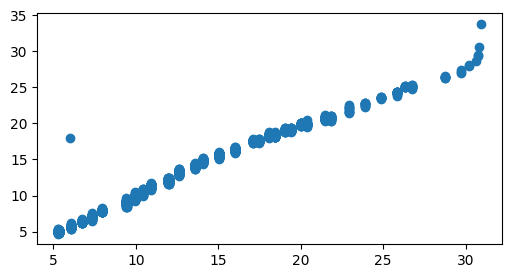

In [143]:
plt.figure(figsize=(6,3))
plt.scatter(Y_test,y_pred1)

In [156]:
from sklearn.metrics import *
print('r-square score:',r2_score(Y_test,y_pred1))
absolute_errors = abs(y_pred1 - Y_test) 
print('Mean Absolute Error:', round(np.mean(absolute_errors), 2))
mape = 100 * (absolute_errors/Y_test) 
accuracy = 100 - np.mean(mape) 
print('Accuracy:', round(accuracy, 2), '%.')

r-square score: 0.985834229462592
Mean Absolute Error: 0.42
Accuracy: 96.47 %.


Significance of Parameters
>- n_estimators: number of tree
>
>- random_state: sets the seed for the random number generator used by the algorithm. This ensures that the results are reproducible if the same seed is used in multiple runs. It is important to set this parameter to a fixed value when performing any kind of randomization in order to obtain consistent results

In [204]:
estimators = np.arange(10, 101, 10)
list_result = []
for n in estimators:
    rf = RandomForestRegressor(n_estimators=n, random_state=42)
    rf.fit(X_train, Y_train)
    y_pred2 =rf.predict(X_test)
    R_square = r2_score(Y_test,y_pred2)
    list_result .append(R_square)
optimal_n = estimators[list_result.index(max(list_result))]
print("Optimal n_estimators:", optimal_n)

Optimal n_estimators: 10


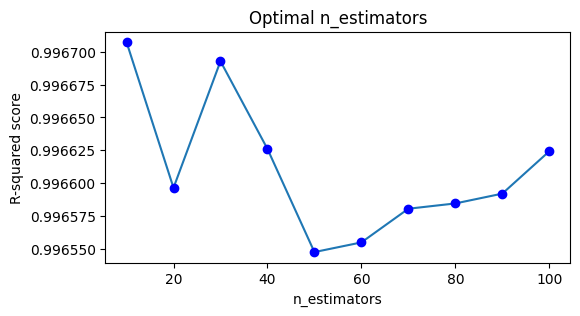

In [197]:
plt.figure(figsize=(6,3))
plt.plot(estimators,list_result)
plt.plot(estimators, list_result, 'bo')
plt.xlabel('n_estimators')
plt.ylabel('R-squared score')
plt.title('Optimal n_estimators')
plt.show()

In [205]:
Regressor = RandomForestRegressor(n_estimators=10, random_state=42)
Regressor.fit(X_train, Y_train)
y_pred2 =rf.predict(X_test)
print('r-square score:',r2_score(Y_test,y_pred2))
absolute_errors = abs(y_pred2 - Y_test) 
print('Mean Absolute Error:', round(np.mean(absolute_errors), 2))
mape = 100 * (absolute_errors/Y_test) 
accuracy = 100 - np.mean(mape) 
print('Accuracy:', round(accuracy, 2), '%.')

r-square score: 0.9966241958961547
Mean Absolute Error: 0.04
Accuracy: 99.7 %.


Lãi suất của mỗi khoản vay sẽ được đánh giá dựa trên nhiều thông tin nhằm có thể tính toán và định giá được lãi suất phù hợp với từng khoản vay để đảm bảo rằng các khoản vay đều có khả năng trả nợ tốt, giúp cân bằng giữa rủi ro và lợi nhuận cho tổ chức

Hướng phát triển và cải thiện thêm cho mô hình: Có thể cái thiện mô hình hồi quy tuyến tính bằng cách thực hiện phép biến đổi đa thức bậc hai hoặc bậc ba để tăng tính phức tạp của mô hình hồi quy và giúp nó phù hợp hơn với dữ liệu. Đồng thời giúp có thêm các thông tin về độ cong và độ cong của mối quan hệ giữa các biến, giúp mô hình hồi quy phù hợp hơn với dữ liệu và có khả năng dự đoán tốt hơn.